# Exploratory Data Analysis for Data set C

# Step 1 - Data Cleaning

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from google.colab import data_table
plt.rcParams["figure.figsize"] = (20,5)

In [8]:
CompanyC = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Collaborative App Dev/EventBookingPrediction/DatasetC.csv')
CompanyC = CompanyC[CompanyC['BookingStatus'] == 'Registered']

print(CompanyC.info())
# data_table.DataTable(CompanyC)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245655 entries, 0 to 245987
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EventName          245655 non-null  object 
 1   StartDate          245655 non-null  object 
 2   EventType          275 non-null     object 
 3   BookingReference   245655 non-null  object 
 4   AttendeeReference  245655 non-null  object 
 5   GroupSize          245655 non-null  int64  
 6   IsLeadAttendee     245655 non-null  object 
 7   AttendeeGrossCost  245655 non-null  int64  
 8   EventId            245655 non-null  int64  
 9   BookingStatus      245655 non-null  object 
 10  AttendeeType       245655 non-null  object 
 11  TicketType         0 non-null       float64
 12  StatusCreatedDate  245655 non-null  object 
 13  ClientId           245655 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 28.1+ MB
None


In [ ]:
def event_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['eventdayofweek'] = dfs.StartDate.dt.dayofweek
    dfs['eventquarter'] = dfs.StartDate.dt.quarter
    dfs['eventmonth'] = dfs.StartDate.dt.month
    dfs['eventyear'] = dfs.StartDate.dt.year
    dfs['eventdayofyear'] = dfs.StartDate.dt.dayofyear
    dfs['eventdayofmonth'] = dfs.StartDate.dt.day
    dfs['eventweekofyear'] = dfs.StartDate.dt.isocalendar().week
    return dfs

def Booking_features(dfs):
    """
    Create time series features based on time series index.
    """
    dfs = dfs.copy()
    dfs['Bookingdayofweek'] = dfs.StatusCreatedDate.dt.dayofweek
    dfs['Bookingquarter'] = dfs.StatusCreatedDate.dt.quarter
    dfs['Bookingmonth'] = dfs.StatusCreatedDate.dt.month
    dfs['Bookingyear'] = dfs.StatusCreatedDate.dt.year
    dfs['Bookingdayofyear'] = dfs.StatusCreatedDate.dt.dayofyear
    dfs['Bookingdayofmonth'] = dfs.StatusCreatedDate.dt.day
    dfs['Bookingweekofyear'] = dfs.StatusCreatedDate.dt.isocalendar().week
    return dfs

# Company C

In [ ]:
#Formating and adding new columns to the dataset
CompanyC['StatusCreatedDate'] = pd.to_datetime(CompanyC['StatusCreatedDate'], infer_datetime_format=True)
CompanyC['StartDate'] = pd.to_datetime(CompanyC['StartDate'], infer_datetime_format=True)
CompanyC['BookingDaysToEvent'] = abs((CompanyC['StartDate'] - CompanyC['StatusCreatedDate']).dt.days)
CompanyC['BookingWeeksToEvent'] = round(CompanyC['BookingDaysToEvent']/7,0)
CompanyC['Bookingweeknumber'] = pd.DatetimeIndex(CompanyC['StatusCreatedDate']).week
CompanyC['eventWeeknumber'] = pd.DatetimeIndex(CompanyC['StartDate']).week

# To create Season column
_condition_winter = (CompanyC.StartDate.dt.month>=1)&(CompanyC.StartDate.dt.month<=3)
_condtion_spring = (CompanyC.StartDate.dt.month>=4)&(CompanyC.StartDate.dt.month<=6)
_condition_summer = (CompanyC.StartDate.dt.month>=7)&(CompanyC.StartDate.dt.month<=9)
_condition_autumn = (CompanyC.StartDate.dt.month>=10)&(CompanyC.StartDate.dt.month<=12)

CompanyC['EventSeason'] = np.where(_condition_winter,'Winter',np.where(_condtion_spring,'Spring',np.where(_condition_summer,'Summer',np.where(_condition_autumn,'Autumn',np.nan))))

<ipython-input-9-baa13287032e>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  CompanyC['Bookingweeknumber'] = pd.DatetimeIndex(CompanyC['StatusCreatedDate']).week
<ipython-input-9-baa13287032e>:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  CompanyC['eventWeeknumber'] = pd.DatetimeIndex(CompanyC['StartDate']).week


In [ ]:
CompanyC.head()
# data_table.DataTable(Company)

,EventName,StartDate,EventType,BookingReference,AttendeeReference,GroupSize,IsLeadAttendee,AttendeeGrossCost,EventId,BookingStatus,...,StatusCreatedDate,ClientId,PurchaseDaysToEvent,PurchaseWeeksToEvent,purchaseweeknumber,eventWeeknumber,EventSeason,BookingDaysToEvent,BookingWeeksToEvent,Bookingweeknumber
0,Developing Reading and Writing Skills,2017-11-28,NaN,B462687,A514297,1,True,0,14983,Registered,...,2017-11-11 09:15:00,153.0,16,2.0,45,48,Autumn,16,2.0,45
1,Teaching Grammar: Classroom choices,2017-12-13,NaN,B462689,A514299,1,True,0,14960,Registered,...,2017-11-11 09:18:00,153.0,31,4.0,45,50,Autumn,31,4.0,45
2,Teaching Grammar: Classroom choices,2017-12-13,NaN,B467150,A519135,1,True,0,14960,Registered,...,2017-11-22 17:02:00,153.0,20,3.0,47,50,Autumn,20,3.0,47
3,Academic vocabulary: what do students need to ...,2018-04-19,NaN,B533234,A588469,1,True,0,15893,Registered,...,2018-11-04 13:38:00,153.0,200,29.0,44,16,Spring,200,29.0,44
4,Researching the classroom,2018-11-14,NaN,B604614,A662691,1,True,0,17350,Registered,...,2018-10-15 14:33:00,153.0,29,4.0,42,46,Autumn,29,4.0,42


2.0 EDA Tables

In [ ]:
Seaons_df = CompanyC.groupby(['EventSeason', 'EventId', 'BookingWeeksToEvent']).aggregate({'GroupSize':'sum'}).reset_index()
Seaons_df.head()

,EventSeason,EventId,BookingWeeksToEvent,GroupSize
0,Autumn,12595,111.0,1
1,Autumn,14824,0.0,136
2,Autumn,14824,1.0,166
3,Autumn,14824,2.0,61
4,Autumn,14824,4.0,27


In [ ]:
Seaons_df['EventSeason'].unique()

array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)

In [ ]:
min_result = CompanyC.groupby([ 'EventSeason', 'EventId']).aggregate({'GroupSize':'sum','BookingWeeksToEvent':'min'}).reset_index()
min_result.columns = ['Season','EventId', 'TotalTickets', 'LastBookingWeek']

max_result = CompanyC.groupby(['EventSeason', 'EventId']).aggregate({'GroupSize':'sum', 'BookingWeeksToEvent':'max'}).reset_index()
max_result.columns = [ 'Season2',  'EventId2', 'TotalTickets2', 'FirstBookingWeek']

result_df = pd.concat([min_result, max_result], axis=1, join="inner")

result_df['TotalWeeksToSell'] = result_df['FirstBookingWeek'] - result_df['LastBookingWeek']
result_df.drop(columns=['TotalTickets2', 'Season2',  'EventId2'], inplace=True)
result_df

,Season,EventId,TotalTickets,LastBookingWeek,FirstBookingWeek,TotalWeeksToSell
0,Autumn,12595,1,111.0,111.0,0.0
1,Autumn,14824,813,0.0,46.0,46.0
2,Autumn,14912,338,0.0,45.0,45.0
3,Autumn,14923,494,0.0,46.0,46.0
4,Autumn,14948,324,0.0,24.0,24.0
...,...,...,...,...,...,...
482,Winter,23774,1,40.0,40.0,0.0
483,Winter,23775,1,40.0,40.0,0.0
484,Winter,27368,6,0.0,37.0,37.0
485,Winter,27545,1,42.0,42.0,0.0


In [ ]:
result_df['Season'].unique()

array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)

2.1 EDA Graphs

In [ ]:
# Plotting graphs
def ploting(df2, x, y, title="", xlabel='Weeks to event', ylabel='No of tickets sold', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red', marker='*')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    # plt.savefig(title, bbox_inches='tight')

In [ ]:
#Plotting with numbers as markers
import pylab as pl
def ploting2(df2, x, y, title="", xlabel='Weeks to event', ylabel='No of tickets sold', dpi=100):
    pl.figure(figsize=(20,5), dpi=dpi)
    pl.plot(x, y, marker='*')
    for x, y in zip(x, y):
      pl.text(x, y, str(y), color="red", fontsize=12)
      pl.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    pl.margins(0.1)

In [ ]:
def plotbar(xa, ya, xlable, ylabel, title):
  x = xa
  y = ya

  x = np.arange(len(x)) # the label locations
  width = 0.35 # the width of the bars

  fig, ax = plt.subplots()

  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlable)
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(xa)

  pps = ax.bar(x, y, width, label=x)
  for p in pps:
    height = p.get_height()
    ax.annotate('{}'.format(height),
        xy=(p.get_x() + p.get_width() / 2, height),
        xytext=(0, 3), # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

  plt.show()

Plotting average ticket Booking per season for weeks to events

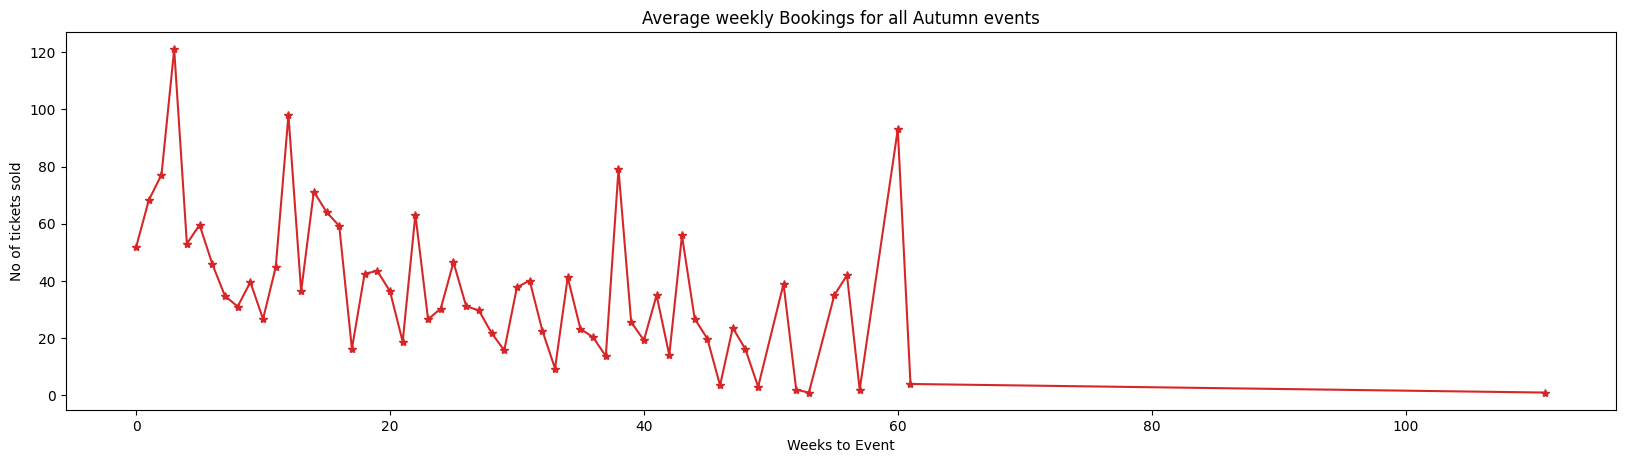

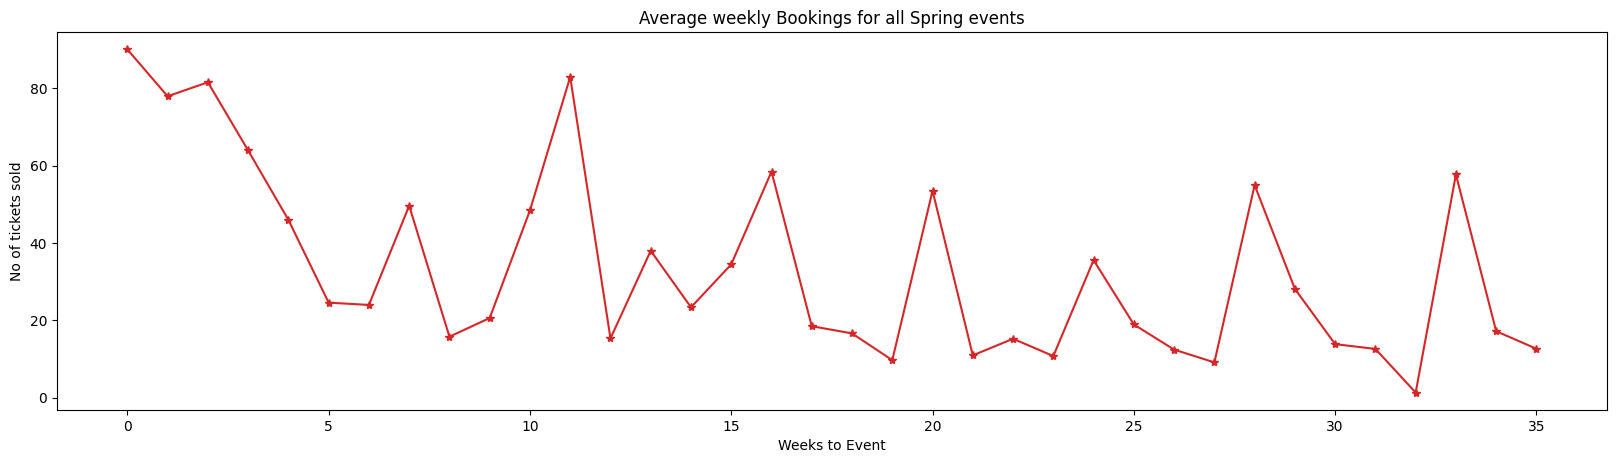

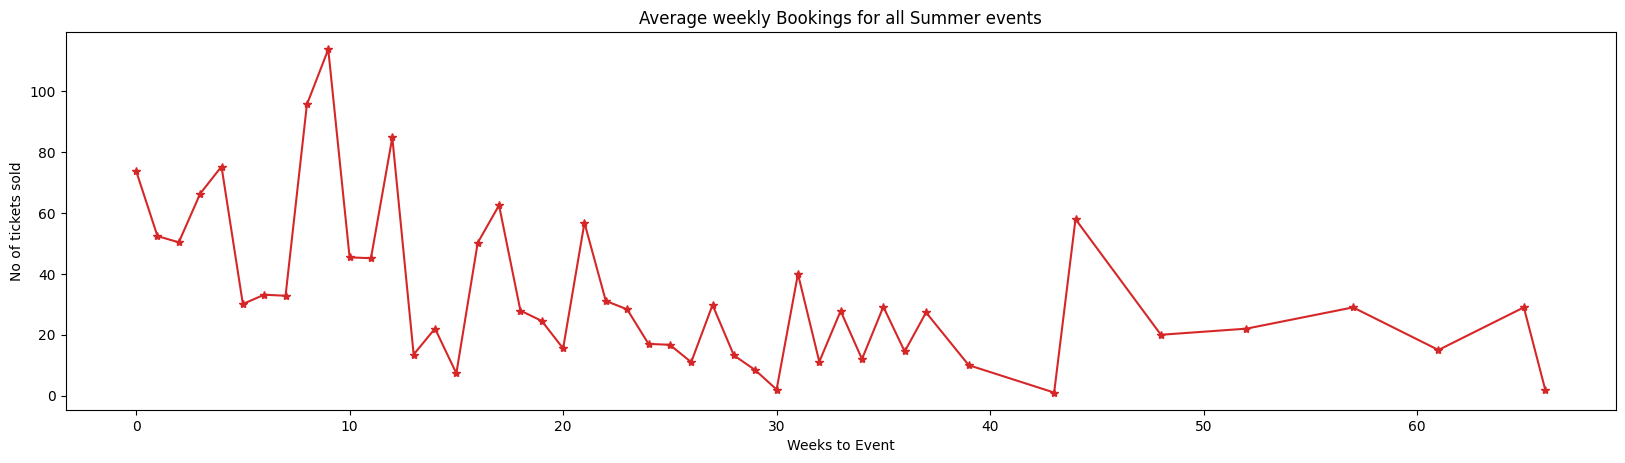

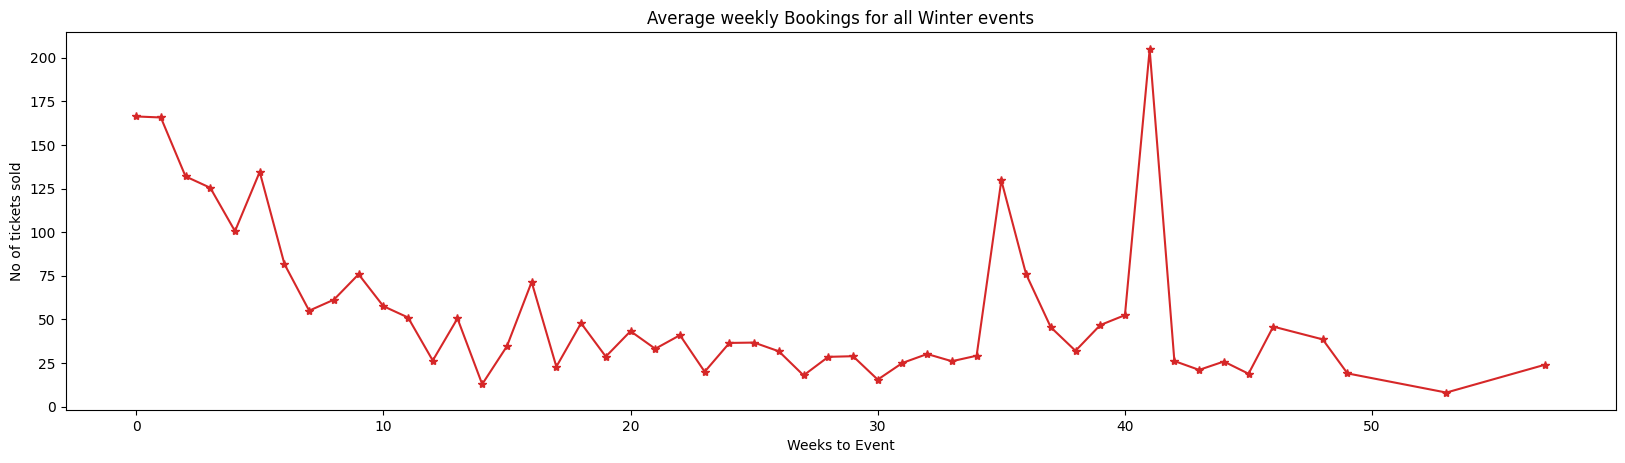

In [ ]:
#Plotting average ticket Booking per season
Autumn_df = Seaons_df[Seaons_df['EventSeason'] == 'Autumn'].groupby('BookingWeeksToEvent').mean()
Spring_df = Seaons_df[Seaons_df['EventSeason'] == 'Spring'].groupby('BookingWeeksToEvent').mean()
Summer_df = Seaons_df[Seaons_df['EventSeason'] == 'Summer'].groupby('BookingWeeksToEvent').mean()
Winter_df = Seaons_df[Seaons_df['EventSeason'] == 'Winter'].groupby('BookingWeeksToEvent').mean()

ploting(Autumn_df, Autumn_df.index, Autumn_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Autumn events' )
ploting(Spring_df, Spring_df.index, Spring_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Spring events' )
ploting(Summer_df, Summer_df.index, Summer_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Summer events' )
ploting(Winter_df, Winter_df.index, Winter_df.GroupSize, xlabel='Weeks to Event', title= 'Average weekly Bookings for all Winter events' )

# Spring_df.GroupSize.plot(legend=True, figsize=(20,10))



Average first week of Booking per season - when tickets starts selling

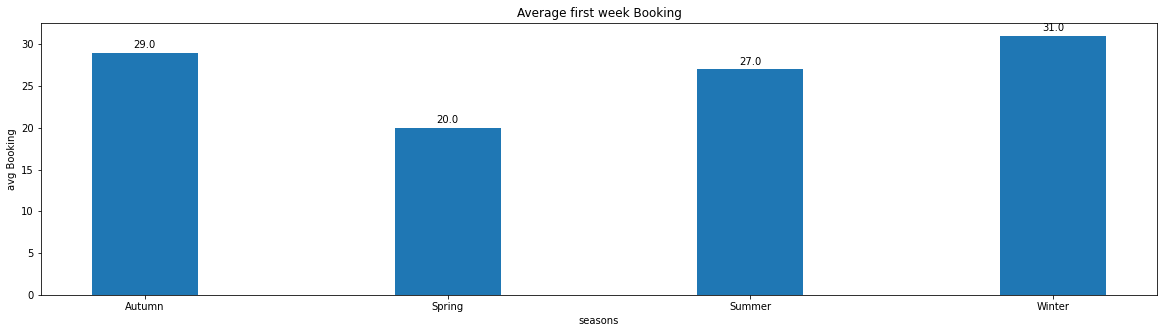

In [ ]:
first_Booking = result_df.groupby(['Season']).aggregate({'FirstBookingWeek':'mean'}).reset_index()
first_Booking['FirstBookingWeek'] = round(first_Booking['FirstBookingWeek'])
plotbar(first_Booking['Season'], first_Booking['FirstBookingWeek'], 'seasons', 'avg Booking',  'Average first week Booking')

Average last week ticket Booking

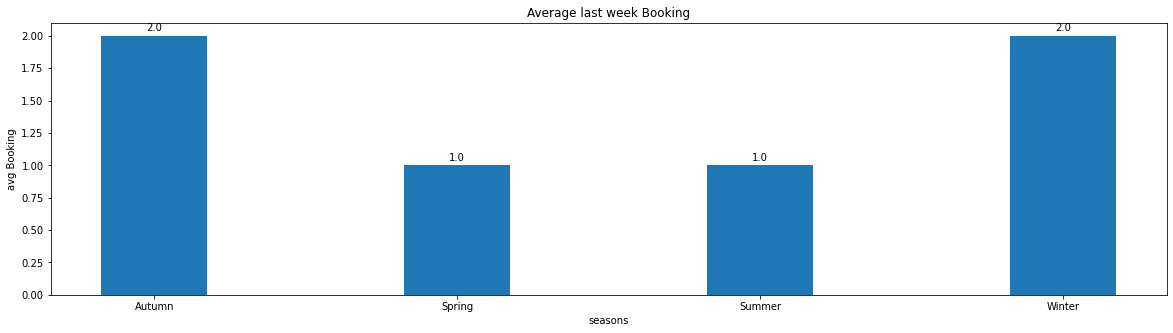

In [ ]:
last_Booking = result_df.groupby(['Season']).aggregate({'LastBookingWeek':'mean'}).reset_index()
last_Booking['LastBookingWeek'] = round(last_Booking['LastBookingWeek'])
plotbar(last_Booking['Season'], last_Booking['LastBookingWeek'], 'seasons', 'avg Booking',  'Average last week Booking')

Average total weeks to sell tikcets

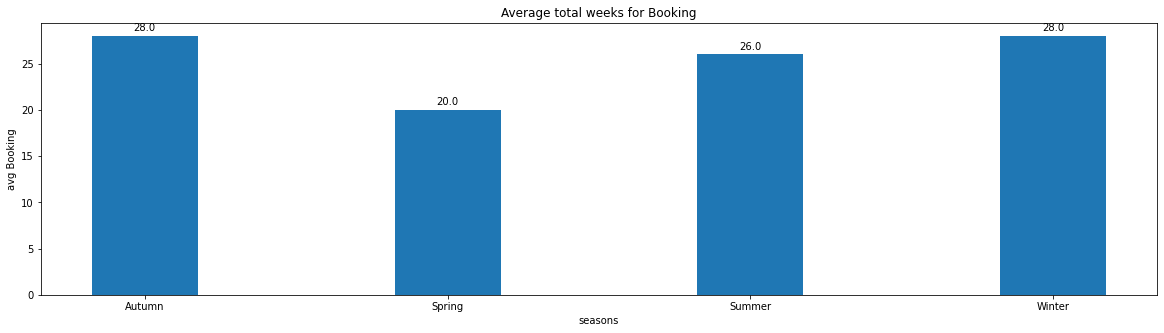

In [ ]:
total_Booking = result_df.groupby(['Season']).aggregate({'TotalWeeksToSell':'mean'}).reset_index()
total_Booking['TotalWeeksToSell'] = round(total_Booking['TotalWeeksToSell'])
plotbar(total_Booking['Season'], total_Booking['TotalWeeksToSell'], 'seasons', 'avg Booking',  'Average total weeks for Booking')